In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
descriptive_prompt_9 =  "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Find any known binding or active sites. 4. Simulate for 1 ps at 300 K. 5. Compute the RMSD of the simulation at 300 K. 6. Compute the radius of gyration over time for the simulation at 300 K. 7. Simulate for 1 ps at 400 K. 8. Compute the RMSD of the simulation at 400 K. 9. Compute the radius of gyration over time for the simulation at 400 K."
non_descriptive_prompt_9 = "Simulate 1LYZ for 1 ps at 300K and 400K. Tell me how many residues are in the chains and beta sheets and any known binding or active sites. Compute RMSD and radius of gyration of both simulations."

Required Tasks:
- Download
- SS Analysis
- Simulation_1
- RMSD_1
- Rgy_1
- Simulation_2
- RMSD_2
- Rgy_2
- Binding/Active Sites

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(descriptive_prompt_9)

Thought: To complete all these tasks, I'll need to use multiple tools in sequence. Let's start with downloading the PDB file for 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's analyze the structure to determine the number of residues in the chains and beta sheets.

Action:
```
{
    "action": "GetTurnsBetaSheetsHelices",
    "action_input": "1LYZ"
}
```Thought: I apologize for the confusion. It seems that the GetTurnsBetaSheetsHelices tool didn't provide the information we need. Let's try using the SummarizeProteinStructure tool to get information about the residues and structure of 1LYZ.

Action:
```
{
    "action": "SummarizeProteinStructure",
    "action_input": {"traj_file": "1LYZ_185706", "top_file": "1LYZ_185706"}
}
```Thought: We've obtained some information about the structure of 1LYZ. Now, let's find any known binding or act

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry = agent_1.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_185706: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_185706
 1LYZ_185729: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_185734: Initial positions for simulation sim0_185734
 sim0_185734: Basic Simulation of Protein 1LYZ_185729
 rec0_185739: Simulation trajectory for protein 1LYZ_185729 and simulation sim0_185734
 rec1_185739: Simulation state log for protein 1LYZ_185729 and simulation sim0_185734
 rec2_185739: Simulation pdb frames for protein 1LYZ_185729 and simulation sim0_185734
 rmsd_185734: RMSD for 185734
 fig0_190328: RMSD plot for 185734
 rgy_rec0_185739: Radii of gyration per frame for rec0_185739
 fig0_190332: Plot of radii of gyration over time for rec0_185739
 top_sim0_190337: Initial positions for simulation sim0_190337
 sim0_190337: Basic Simulation of Protein 1LYZ_185729
 rec0_190343: Simulation trajectory f

In [6]:
assert os.path.exists(registry.get_mapped_path("rec0_185739"))
assert os.path.exists(registry.get_mapped_path("top_sim0_185734"))
assert os.path.exists(registry.get_mapped_path("rmsd_185734"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_185739"))


assert os.path.exists(registry.get_mapped_path("rec0_190343"))
assert os.path.exists(registry.get_mapped_path("top_sim0_190337"))
assert os.path.exists(registry.get_mapped_path("rmsd_190337"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_190343"))

assert os.path.exists(registry.get_mapped_path("1LYZ_185706"))

In [8]:
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P00698")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}, {'start': 70, 'start_modifier': 'EXACT', 'end': 70, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nBinding Sites: [{'start': 119, 'start_modifier': 'EXACT', 'end': 119, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nNo other relevant sites."

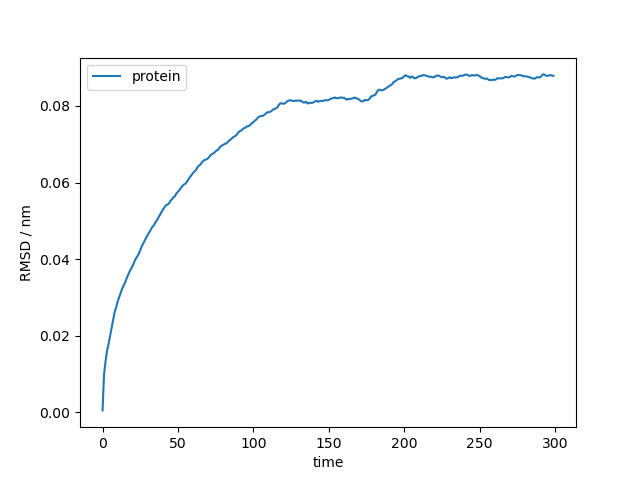

In [9]:
#plot rmsd1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_190328'))

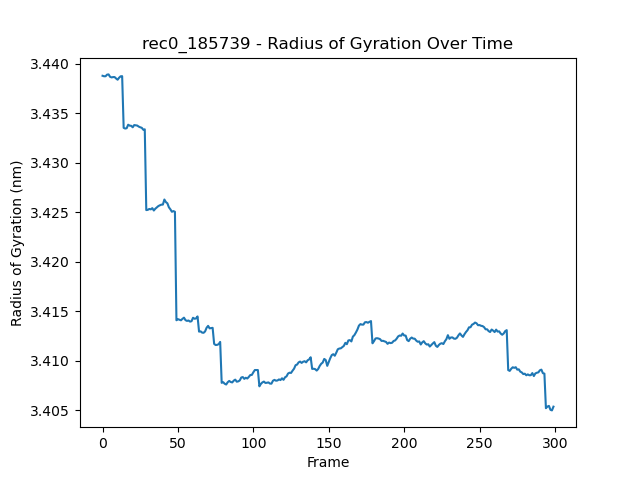

In [10]:
#plot rgy1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_190332'))

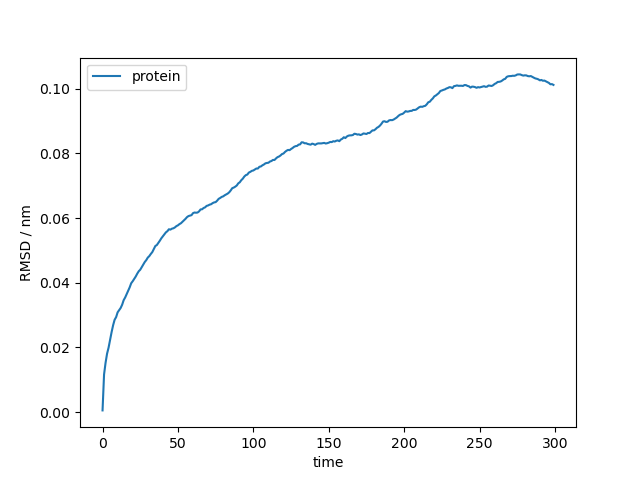

In [11]:
#plot rmsd2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_190848'))

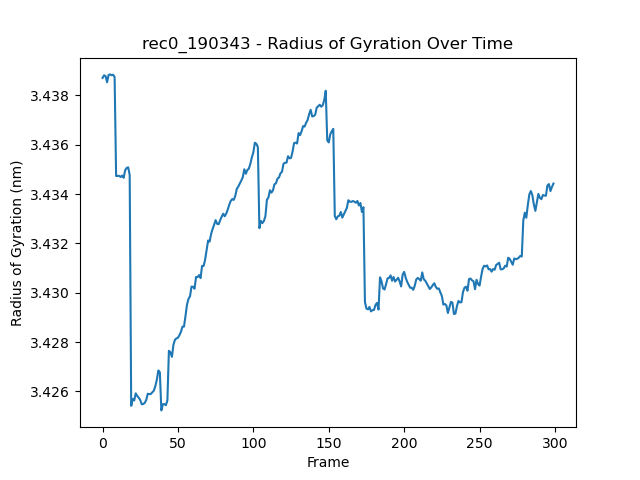

In [12]:
#plot rgy2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_190851'))

In [13]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(non_descriptive_prompt_9)

Thought: To answer this question comprehensively, I need to follow several steps. First, I'll download the PDB file for 1LYZ, then run simulations at both temperatures, analyze the protein structure, find binding and active sites, and finally compute RMSD and radius of gyration for both simulations. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's analyze the protein structure to get information about the residues, chains, and beta sheets. We'll use the SummarizeProteinStructure tool for this.

Action:
```
{
    "action": "SummarizeProteinStructure",
    "action_input": {
        "traj_file": "1LYZ_192438",
        "top_file": "1LYZ_192438"
    }
}
```Thought: We've obtained some basic information about the protein structure. Now, let's get more detailed information about the secondary structure, in

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [14]:
registry = agent_2.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_192438: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_192438
 rec0_192444: dssp values for trajectory with id: 1LYZ_192438
 1LYZ_192504: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_192508: Initial positions for simulation sim0_192508
 sim0_192508: Basic Simulation of Protein 1LYZ_192504
 rec0_192513: Simulation trajectory for protein 1LYZ_192504 and simulation sim0_192508
 rec1_192513: Simulation state log for protein 1LYZ_192504 and simulation sim0_192508
 rec2_192513: Simulation pdb frames for protein 1LYZ_192504 and simulation sim0_192508
 top_sim0_192953: Initial positions for simulation sim0_192953
 sim0_192953: Basic Simulation of Protein 1LYZ_192504
 rec0_192957: Simulation trajectory for protein 1LYZ_192504 and simulation sim0_192953
 rec1_192957: Simulation state log for protein 1LYZ_192504 and simulation sim0_19

In [15]:
assert os.path.exists(registry.get_mapped_path("rec0_192513"))
assert os.path.exists(registry.get_mapped_path("top_sim0_192508"))
assert os.path.exists(registry.get_mapped_path("rmsd_192508"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_192513"))


assert os.path.exists(registry.get_mapped_path("rec0_192957"))
assert os.path.exists(registry.get_mapped_path("top_sim0_192953"))
assert os.path.exists(registry.get_mapped_path("rmsd_192953"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_192957"))

assert os.path.exists(registry.get_mapped_path("1LYZ_192438"))

In [17]:
from mdagent.tools.base_tools import ComputeDSSP, SummarizeProteinStructure

sps = SummarizeProteinStructure(registry)
sps._run(traj_file="1LYZ_192438", top_file="1LYZ_192438")


"{'n_atoms': 1102, 'n_residues': 230, 'n_chains': 2, 'n_frames': 1, 'n_bonds': 1025}"

In [18]:
dssp = ComputeDSSP(registry)
dssp._run(traj_file="1LYZ_192438", top_file="1LYZ_192438", target_frames="all")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [19]:
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P00698")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}, {'start': 70, 'start_modifier': 'EXACT', 'end': 70, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nBinding Sites: [{'start': 119, 'start_modifier': 'EXACT', 'end': 119, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nNo other relevant sites."

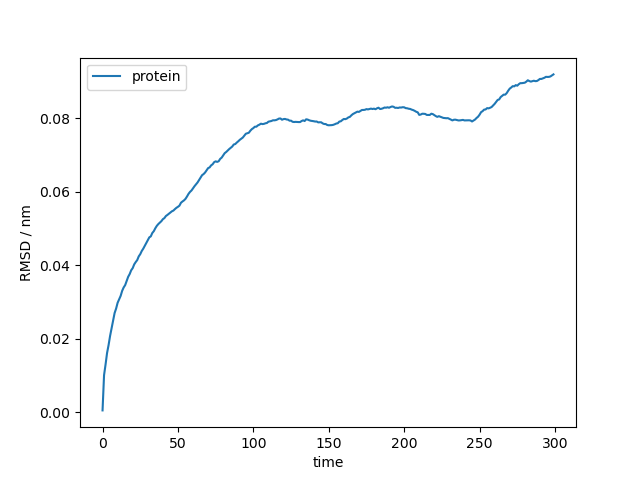

In [20]:
#plot rmsd1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_193408'))

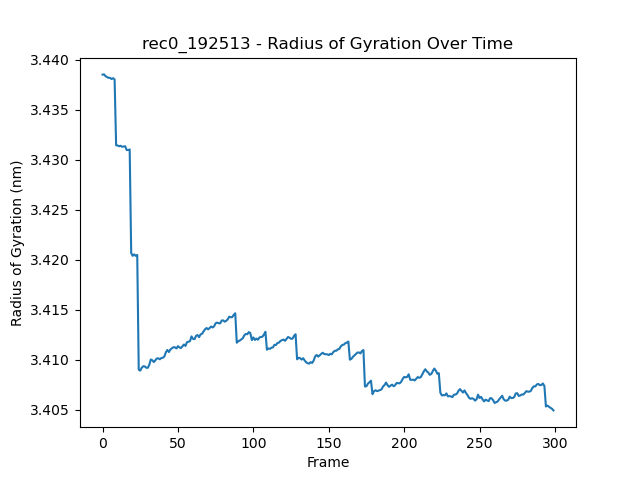

In [21]:
#plot rmsd2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_193415'))

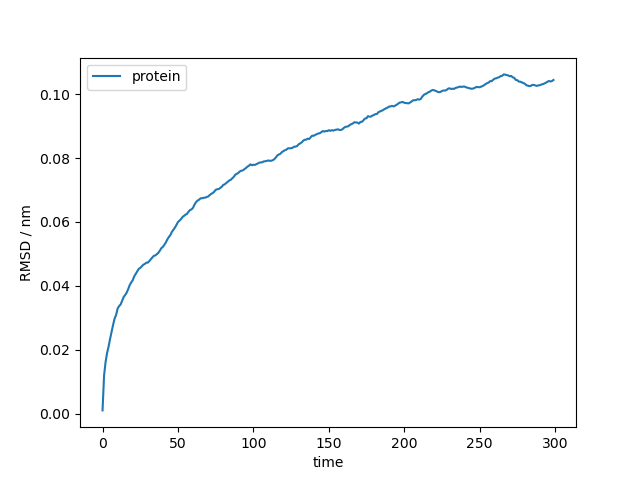

In [22]:
#plot rgy1
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_193411'))

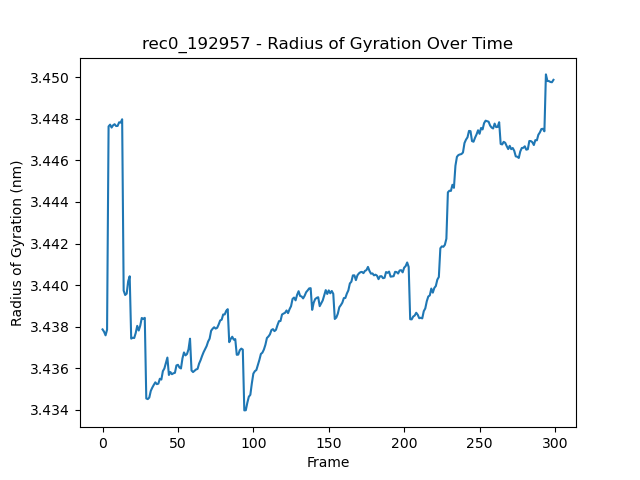

In [23]:
#plot rgy2
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_193418'))